In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [3]:
# n = 50
# np.random.seed(1)
# y = np.array([1]*n + [2]*n + [3]*n + [1]*n) 
# N = len(y)
# X1 = np.linspace(1, N, N)
# f = interp1d(X1, y, kind='quadratic')
# X = np.linspace(1, N, 1*N)
# y = f(X)
# y = y + 0.25*np.random.rand(len(y))
# X = X.reshape(-1,1)

In [25]:
np.random.rand()

0.5392124485058827

In [36]:
np.random.seed(42)
y_clean = np.load('y_data.npy')
y = y_clean + 0.25*(np.random.rand(len(y_clean)) - 0.5)
X = np.linspace(1, len(y), len(y)).reshape(-1,1)

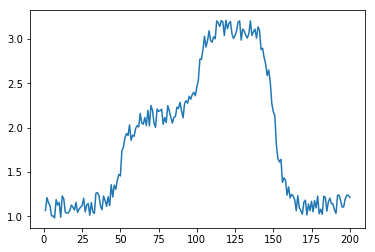

In [37]:
plt.plot(X, y)

In [38]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Decision Tree sin restricciones

In [39]:
dt_reg = DecisionTreeRegressor(random_state=1)

In [40]:
dt_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [41]:
y_pred = dt_reg.predict(X)

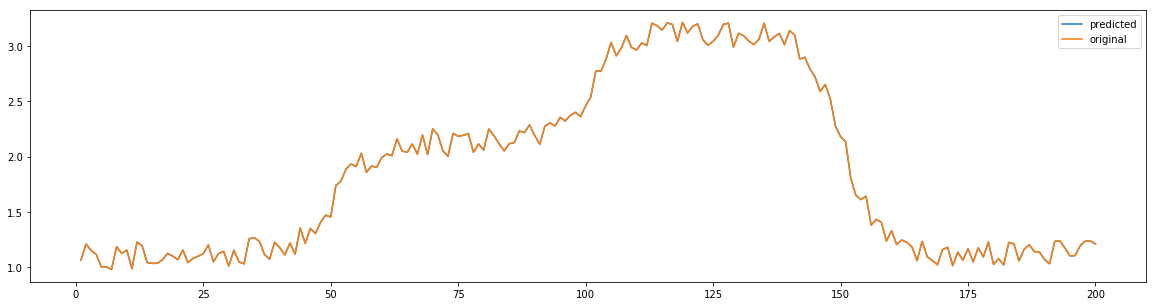

In [42]:
plt.figure(figsize=(20,5))
plt.plot(X, y_pred, label='predicted')
plt.plot(X, y, label='original')
plt.legend()

# Stump

In [43]:
stump_reg = DecisionTreeRegressor(random_state=1, max_depth=1)

In [44]:
stump_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [45]:
y_pred_stump = stump_reg.predict(X)

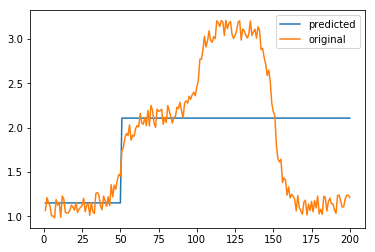

In [46]:
plt.plot(X, y_pred_stump, label='predicted')
plt.plot(X, y, label='original')
plt.legend()

# Bagging

In [47]:
from sklearn.ensemble import BaggingRegressor

In [82]:
bagg_reg = BaggingRegressor(DecisionTreeRegressor(random_state=1, criterion='mse'), n_estimators=10000, 
                             max_samples=0.25, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, random_state=1)

bagg_reg.fit(X, y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=1,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=0

In [83]:
y_pred_bagg = bagg_reg.predict(X)

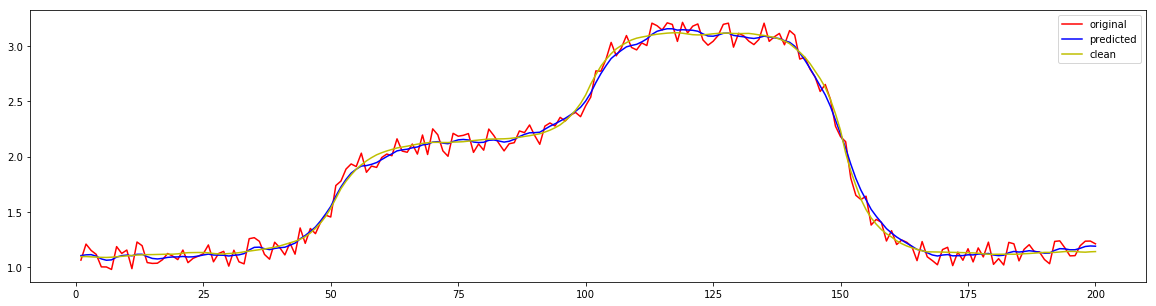

In [86]:
plt.figure(figsize=(20,5))
plt.plot(X, y, label='original', c='r')
plt.plot(X, y_pred_bagg, label='predicted', c='b')
plt.plot(X, y_clean, label='clean', c='y')

plt.legend()

In [85]:
# MSE Bagging
((y_pred_bagg - y_clean)**2).sum()

0.20192570638653132

In [90]:
# MSE Decision Tree
((y_pred - y_clean)**2).sum()

1.0847743996686474

# Estimadores en el bagging

In [93]:
bagg_reg.estimators_[:3]

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=1028862084, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=870353631, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_w

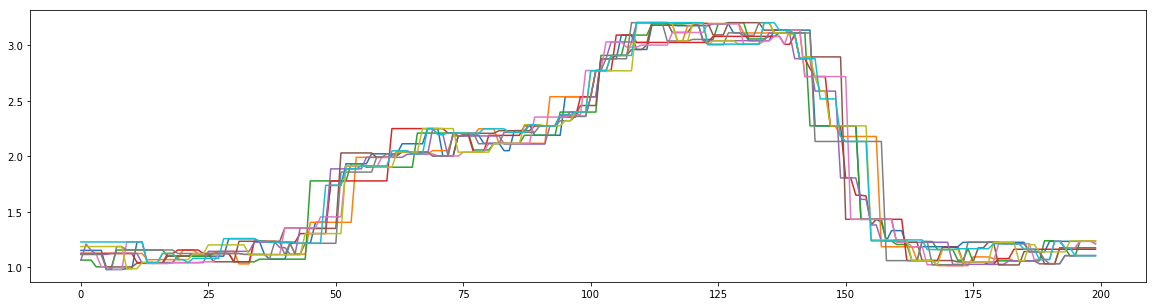

In [100]:
plt.figure(figsize=(20,5))
for DT_predictor in bagg_reg.estimators_[:10]:
    plt.plot(DT_predictor.predict(X))

# Gradient Boosting

In [189]:
from sklearn.ensemble import GradientBoostingRegressor

In [348]:
n_estimators = 3
boost_reg = GradientBoostingRegressor(n_estimators=n_estimators, subsample=1.0, max_depth=1, learning_rate=1.0)

In [349]:
boost_reg.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [350]:
y_boost = boost_reg.predict(X)

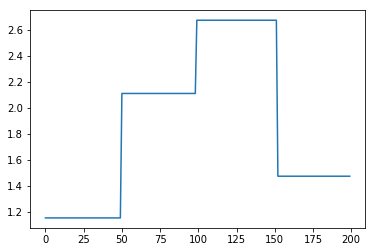

In [351]:
plt.plot(y_boost)

In [353]:
# R^2
boost_reg.score(X, y)

0.8729203640807526

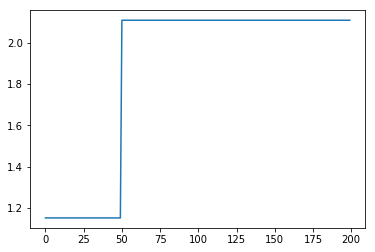

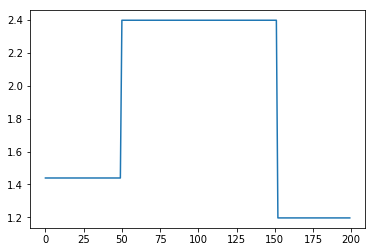

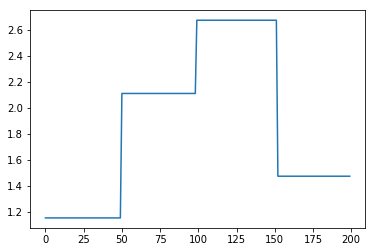

In [354]:
for stage_pred in boost_reg.staged_predict(X):
    plt.plot(stage_pred)
    plt.show()

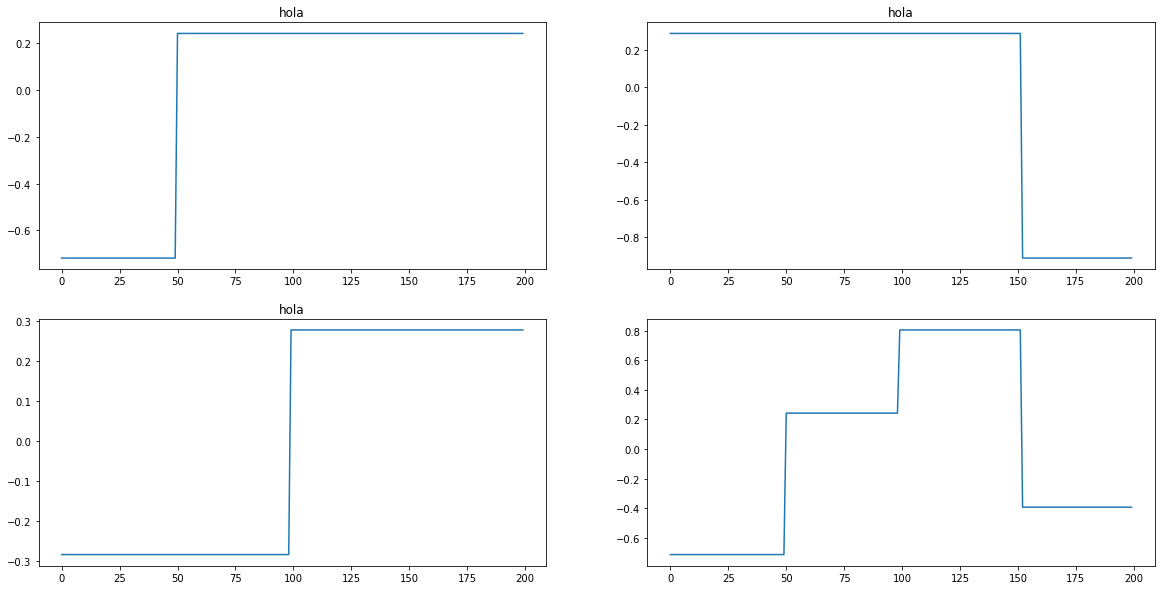

In [301]:
f, ax = plt.subplots(n_estimators//2 + 1, 2, figsize=(20,10))
ax = ax.reshape(-1)
suma = 0
for i, DT_predictor in enumerate(boost_reg.estimators_):
    prediction = DT_predictor[0].predict(X)
    ax[i].plot(prediction)
    suma = suma + prediction
    ax[i].set_title(f'hola')
ax[-1].plot(suma)

In [196]:
boost_reg.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort='auto',
                      random_state=<mtrand.RandomState object at 0x7fc6989b8090>,
                      splitter='best')], dtype=object)